# Import datasets for EDA 

1. [EDA on the network_tv_series](#EDA-on-the-network_tv_series)
    1. [Graph to supporting HBO case](#Graph-to-supporting-HBO-case)
    2. [Removing the Outliers using IQR](#Removing-the-Outliers-using-IQR)

2. [EDA on the imbd_tv_series_df](#EDA-on-the-imbd_tv_series_df)
    1. [Droping Duplicates](#Droping-Duplicates)
    2. [Explode method to separate genres](#Explode-method-to-separate-genres)
    3. [Heatmap](#Heatmap)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

imbd_tv_series_df = pd.read_csv('imbd_tv_series.csv', index_col=0)
network_tv_series_df = pd.read_csv('network_tv_series.csv', index_col=0, encoding='latin1')

# EDA on the network_tv_series

### Lets look into the distribution 

-  Overall distribution
-  Distribution in respect to network

In [2]:
network_tv_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 6 columns):
tv_show        141 non-null object
network        141 non-null object
views_mil      141 non-null float64
season         110 non-null object
_18_49_demo    141 non-null float64
genre          141 non-null object
dtypes: float64(2), object(4)
memory usage: 7.7+ KB


In [3]:
network_tv_series_df.head(20)

,tv_show,network,views_mil,season,_18_49_demo,genre
0,Game of Thrones,hbo,11.992,s8,5.17,"Action, Adventure, Drama"
1,Big Little Lies,hbo,1.643,s2,0.65,"Crime, Drama, Mystery"
2,Barry,hbo,1.597,s2,0.43,"Action, Comedy, Crime"
3,True Detective,hbo,1.247,s3,0.36,"Crime, Drama, Mystery"
4,Perry Mason,hbo,0.937,s1,0.25,"Crime, Drama"
5,The Outsider,hbo,0.914,s1,0.25,"Crime, Drama, Fantasy"
6,Westworld,hbo,0.812,s3,0.23,"Drama, Mystery, Sci-Fi"
7,Watchmen,hbo,0.759,s1,0.20,"Action, Drama, Mystery"
8,Lovecraft Country,hbo,0.749,s1,0.19,"Drama, Fantasy, Horror"
9,Curb Your Enthusiasm,hbo,0.663,s1,0.19,Comedy


In [4]:
network_tv_series_df['genre'] = network_tv_series_df['genre'].str.split(',', 3)

In [5]:
network_tv_series_df2 = network_tv_series_df.explode('genre')

In [6]:
network_tv_series_df2.head()

,tv_show,network,views_mil,season,_18_49_demo,genre
0,Game of Thrones,hbo,11.992,s8,5.17,Action
0,Game of Thrones,hbo,11.992,s8,5.17,Adventure
0,Game of Thrones,hbo,11.992,s8,5.17,Drama
1,Big Little Lies,hbo,1.643,s2,0.65,Crime
1,Big Little Lies,hbo,1.643,s2,0.65,Drama


In [7]:
network_tv_series_df2.genre.unique()

array(['Action', ' Adventure', ' Drama', 'Crime', ' Mystery',
       '\xa0Comedy', '\xa0Crime', '\xa0Drama', '\xa0Mystery', ' Fantasy',
       'Drama', '\xa0Sci-Fi', '\xa0Fantasy', '\xa0Horror', 'Comedy',
       ' Sport', 'Adventure', ' Family', ' Romance', ' Sci-Fi',
       'Biography', ' History', '\xa0Romance', '\xa0Thriller',
       ' Thriller', '\xa0Sport', ' Music', 'Animation', ' Comedy',
       '\xa0Adventure', ' Horror', ' Crime', '\xa0Music', '\xa0Game-Show',
       'Reality-TV', 'Thriller', ' Musical', ' Drama ', ' Biography'],
      dtype=object)

In [8]:
network_tv_series_df2.genre= network_tv_series_df2.genre.str.replace(" ","")

In [9]:
network_tv_series_df2.genre.unique()

array(['Action', 'Adventure', 'Drama', 'Crime', 'Mystery', '\xa0Comedy',
       '\xa0Crime', '\xa0Drama', '\xa0Mystery', 'Fantasy', '\xa0Sci-Fi',
       '\xa0Fantasy', '\xa0Horror', 'Comedy', 'Sport', 'Family',
       'Romance', 'Sci-Fi', 'Biography', 'History', '\xa0Romance',
       '\xa0Thriller', 'Thriller', '\xa0Sport', 'Music', 'Animation',
       '\xa0Adventure', 'Horror', '\xa0Music', '\xa0Game-Show',
       'Reality-TV', 'Musical'], dtype=object)

In [10]:
network_tv_series_df2.genre= network_tv_series_df2.genre.str.replace("\xa0","")

In [11]:
network_tv_series_df2.genre.unique()

array(['Action', 'Adventure', 'Drama', 'Crime', 'Mystery', 'Comedy',
       'Fantasy', 'Sci-Fi', 'Horror', 'Sport', 'Family', 'Romance',
       'Biography', 'History', 'Thriller', 'Music', 'Animation',
       'Game-Show', 'Reality-TV', 'Musical'], dtype=object)

In [12]:
ntv_df_grouped_network= network_tv_series_df2.groupby(['network']).sum()
ntv_df_grouped_network.head()

,views_mil,_18_49_demo
network,,
Showtime,30.251,8.64
Starz,16.518,4.23
The CW,51.198,13.21
hbo,117.387,44.24


# Graph to supporting HBO case

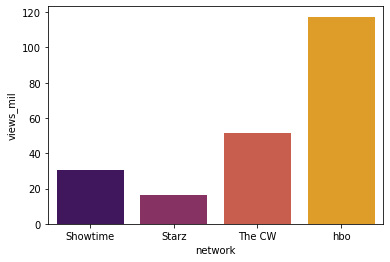

In [13]:
sns.barplot(x=ntv_df_grouped_network.index, y=ntv_df_grouped_network.views_mil,  palette="inferno")

In [14]:
ntv_df_grouped_network1= network_tv_series_df2.groupby(['network']).cumsum()
ntv_df_grouped_network1.head(15)

,views_mil,_18_49_demo
0,11.992,5.17
0,23.984,10.34
0,35.976,15.51
1,37.619,16.16
1,39.262,16.81
1,40.905,17.46
2,42.502,17.89
2,44.099,18.32
2,45.696,18.75
3,46.943,19.11


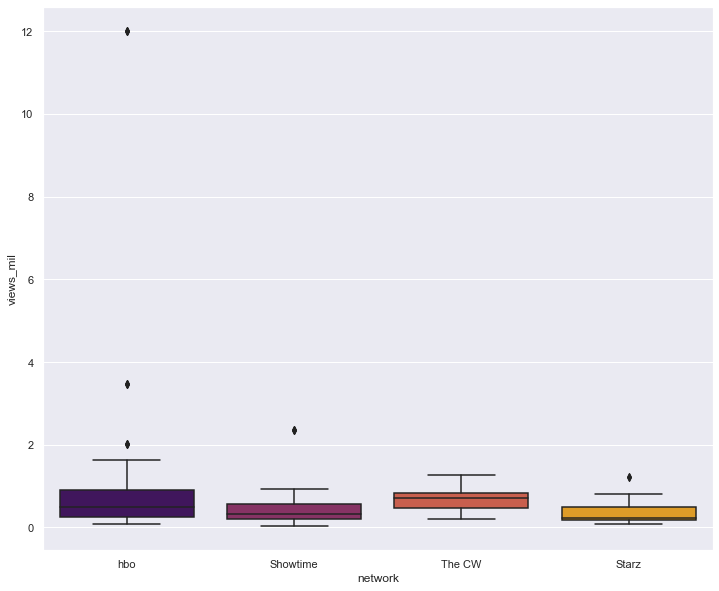

In [15]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x=network_tv_series_df2['network'], y=network_tv_series_df2['views_mil'], palette="inferno")

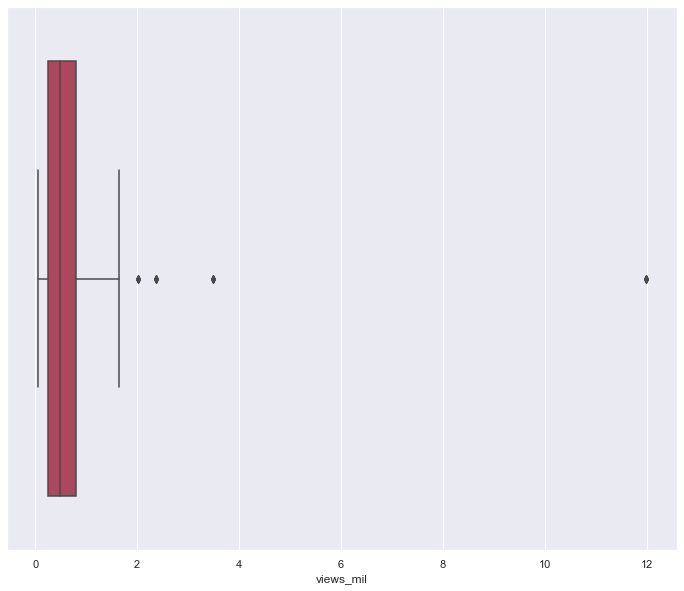

In [16]:
sns.boxplot(x= network_tv_series_df2['views_mil'],  palette="inferno")

_Ohhhhh no looks like we have an outlier in our midst. Who can this mysterious unicorn of a tv series be?
Gaining over 10 times the amount of average views compared to the other networks that are part of this analysis. 
But of course Winter is coming.....literally_ 

In [17]:
ntv_df_o = network_tv_series_df2.loc[0]
print(ntv_df_o)
# print(network_tv_series_df.loc[network_tv_series_df['network'] > 10]) ## need to change the 'network to int'

            tv_show network  views_mil season  _18_49_demo      genre
0  Game of Thrones      hbo     11.992     s8         5.17     Action
0  Game of Thrones      hbo     11.992     s8         5.17  Adventure
0  Game of Thrones      hbo     11.992     s8         5.17      Drama


In [18]:
ntv_df_no = network_tv_series_df2.loc[1:]
ntv_df_no.head()

,tv_show,network,views_mil,season,_18_49_demo,genre
1,Big Little Lies,hbo,1.643,s2,0.65,Crime
1,Big Little Lies,hbo,1.643,s2,0.65,Drama
1,Big Little Lies,hbo,1.643,s2,0.65,Mystery
2,Barry,hbo,1.597,s2,0.43,Action
2,Barry,hbo,1.597,s2,0.43,Comedy


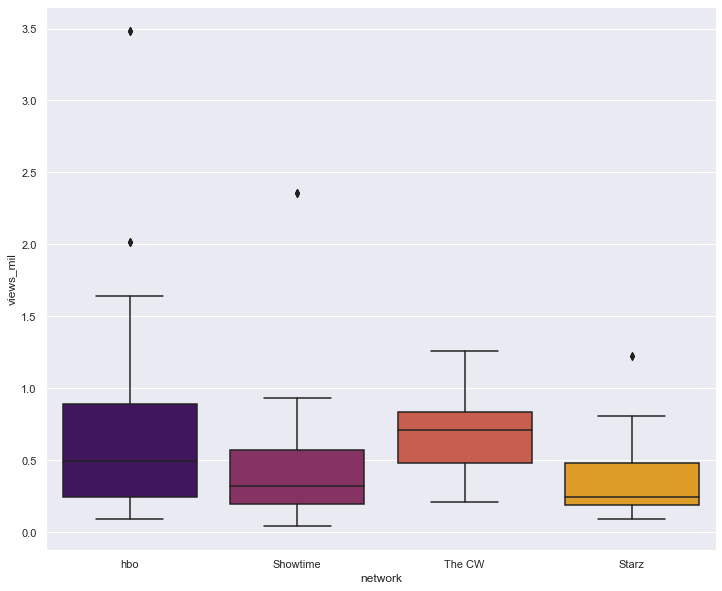

In [19]:
sns.boxplot(x=ntv_df_no['network'], y=ntv_df_no['views_mil'],  palette="inferno")

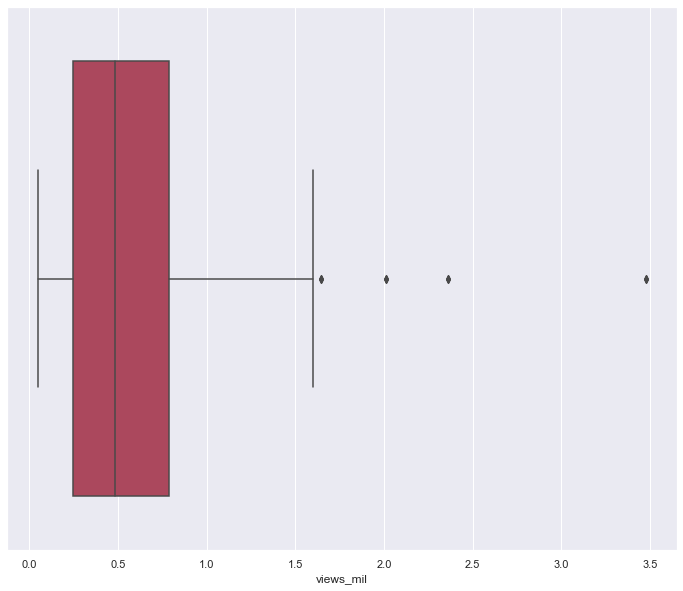

In [20]:
sns.boxplot(x= ntv_df_no['views_mil'], palette="inferno")

In [21]:
# This is where I left off last night. As you can see tv shows usually falls within 0-1 million viewers for each network. 
# meaning those should be obtainable goals to achieve for Microsoft to aim for 

## Removing the Outliers using IQR
__IQR: is good to use to evaluate the distibution of data and keeping a threshold to identify outlier__

In [22]:
Q1 = network_tv_series_df2.quantile(0.25)
Q3 = network_tv_series_df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

views_mil      0.564
_18_49_demo    0.160
dtype: float64


In [23]:
ntv_df_noutlier = network_tv_series_df2[~((network_tv_series_df2 < (Q1 - 1.5 * IQR)) |
                                         (network_tv_series_df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
ntv_df_noutlier.head()

,tv_show,network,views_mil,season,_18_49_demo,genre
2,Barry,hbo,1.597,s2,0.43,Action
2,Barry,hbo,1.597,s2,0.43,Comedy
2,Barry,hbo,1.597,s2,0.43,Crime
3,True Detective,hbo,1.247,s3,0.36,Crime
3,True Detective,hbo,1.247,s3,0.36,Drama


## Summary Statistics 

In [24]:
ntv_df_noutlier.describe()

,views_mil,_18_49_demo
count,275.000000,275.00000
mean,0.514902,0.13840
std,0.315719,0.10002
min,0.046000,0.01000
25%,0.239000,0.06000
50%,0.424000,0.11000
75%,0.749000,0.20500
max,1.597000,0.44000


In [25]:
x = ntv_df_noutlier.genre.value_counts()
print(x)

Drama         94
Comedy        55
Crime         24
Fantasy       17
Mystery       14
Action        12
Adventure     11
Romance       10
Sci-Fi         8
Thriller       5
Reality-TV     4
Horror         4
Sport          3
Biography      3
History        3
Animation      2
Game-Show      2
Music          2
Family         1
Musical        1
Name: genre, dtype: int64


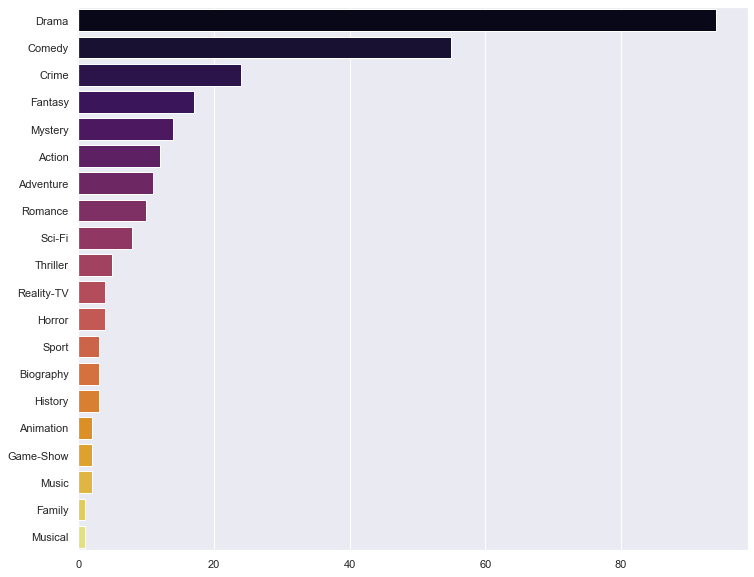

In [26]:
sns.barplot(x=x.values, y=x.index, palette="inferno")

[Text(0, 0, 'Action'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Sport'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Game-Show'),
 Text(0, 0, 'Reality-TV'),
 Text(0, 0, 'Musical')]

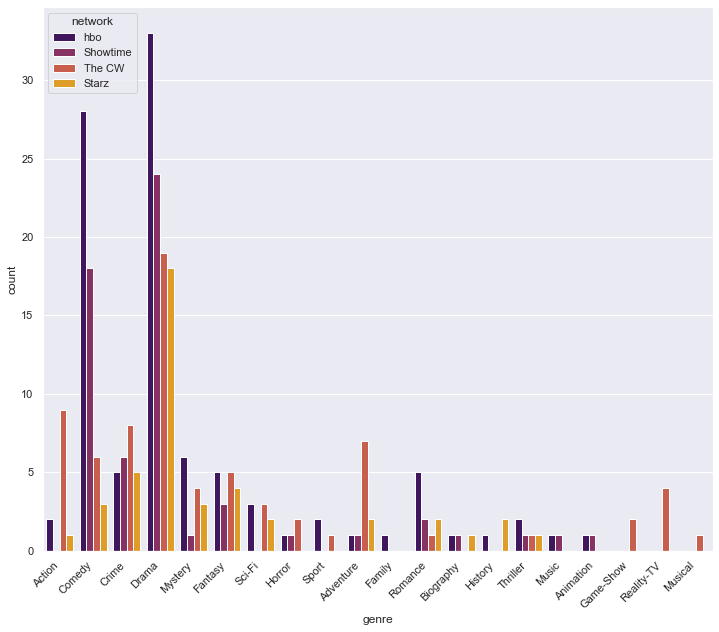

In [27]:
chart= sns.countplot(x ='genre', hue = "network", data = ntv_df_noutlier,palette="inferno")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

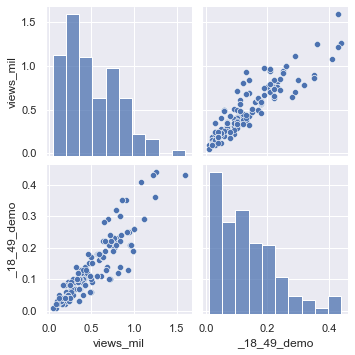

In [28]:
sns.pairplot(ntv_df_noutlier, palette="inferno")

## Box & Whisker Plots: Distribution of view_mil in respect to networks

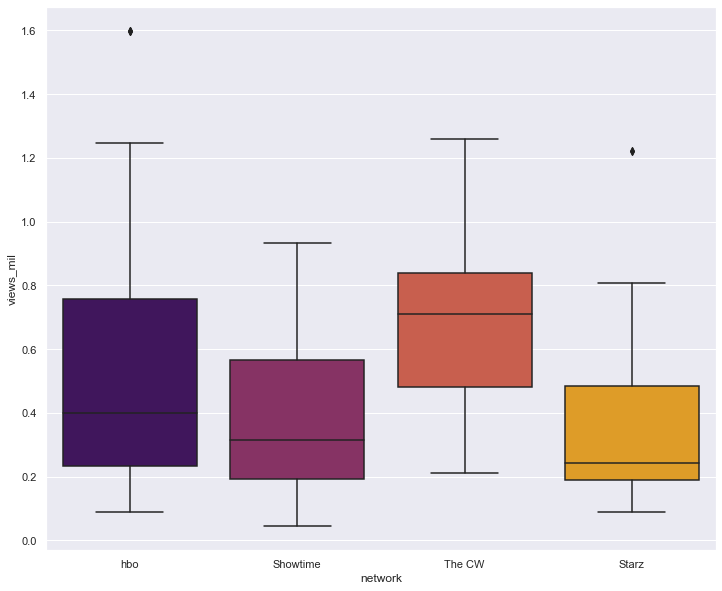

In [29]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x=ntv_df_noutlier['network'], y=ntv_df_noutlier['views_mil'], palette="inferno")

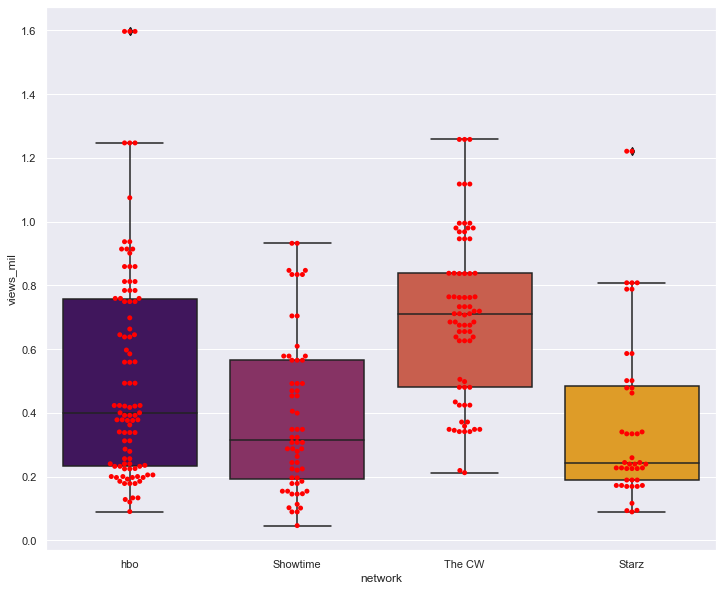

In [30]:
ax= sns.boxplot(x=ntv_df_noutlier['network'], y=ntv_df_noutlier['views_mil'],  palette="inferno")
ax= sns.swarmplot(x=ntv_df_noutlier['network'], y=ntv_df_noutlier['views_mil'], color = 'red')

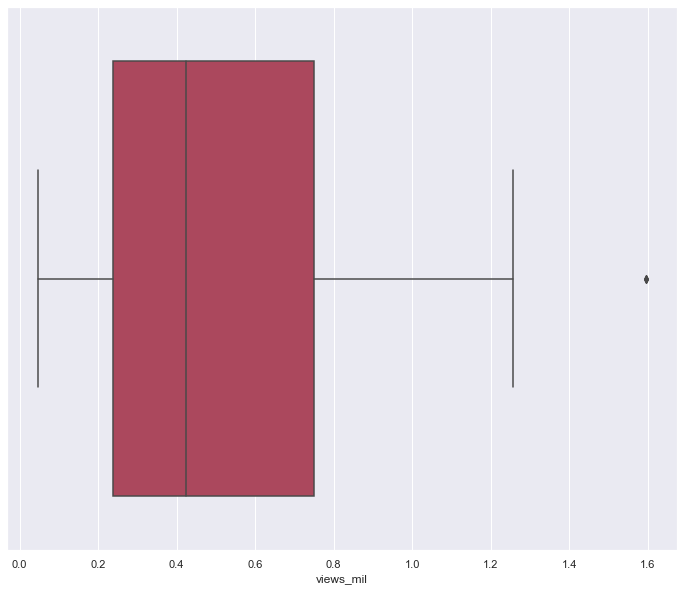

In [31]:
sns.boxplot(x=ntv_df_noutlier['views_mil'], palette="inferno")

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


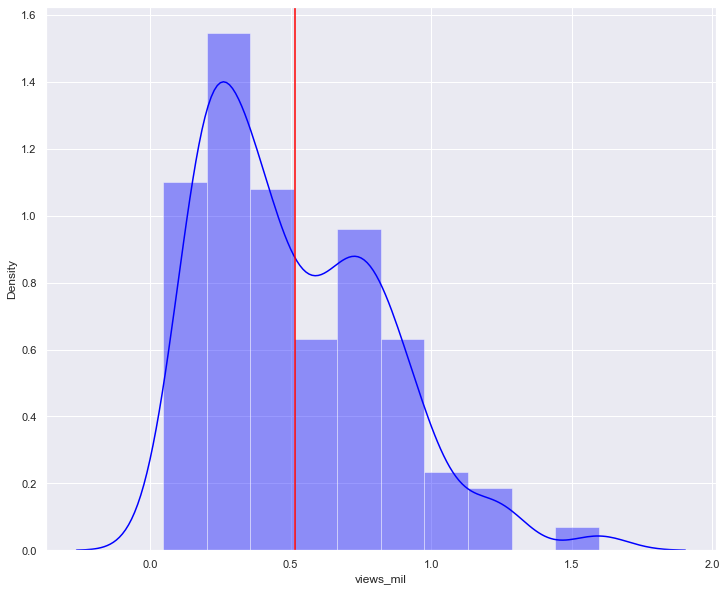

In [32]:
mean= ntv_df_noutlier['views_mil'].mean()
sns.distplot(ntv_df_noutlier['views_mil'],  color='blue')

# plot the mean on the same graph
plt.axvline(mean,0,2, color= 'red')
# As you can see it is a Right skewd distribution because the mean is to the right.0

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


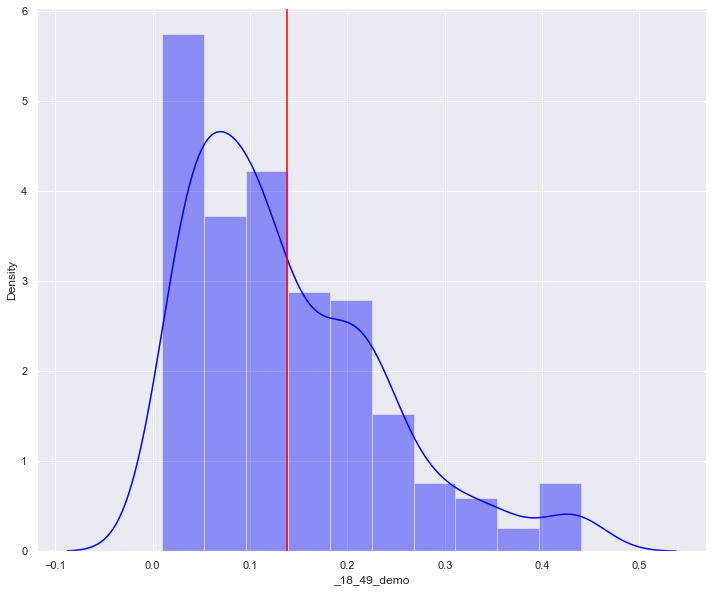

In [33]:
mean1= ntv_df_noutlier['_18_49_demo'].mean()
sns.distplot(ntv_df_noutlier['_18_49_demo'], color= 'blue')

# plot the mean on the same graph
plt.axvline(mean1,0,2, color= 'red')
# As you can see it is a Right skewd distribution because the mean is to the right.0

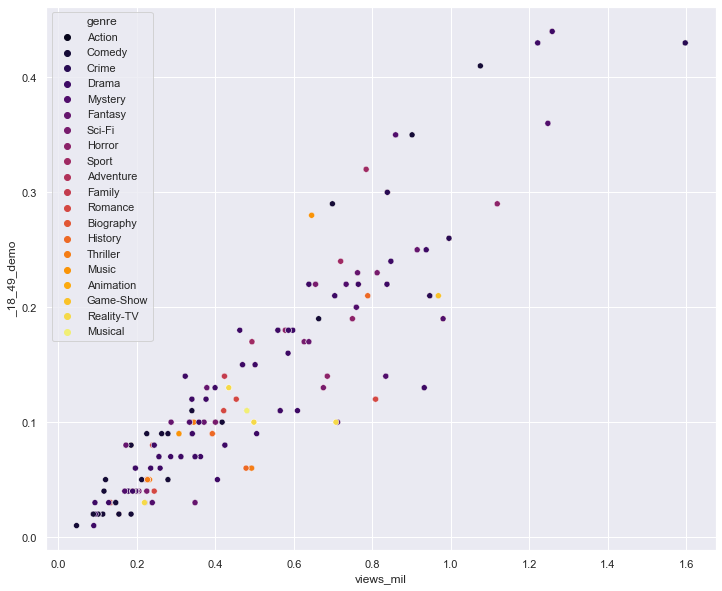

In [34]:
sns.scatterplot(x= 'views_mil', y= '_18_49_demo', data= ntv_df_noutlier, hue= 'genre', palette="inferno")

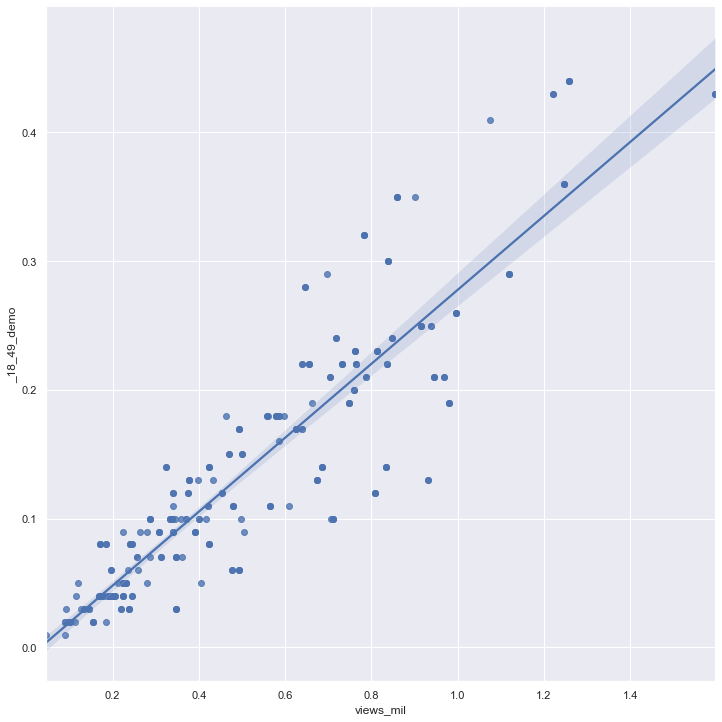

In [35]:
sns.lmplot(x= 'views_mil', y= '_18_49_demo', data= ntv_df_noutlier, height = 10, palette="inferno")

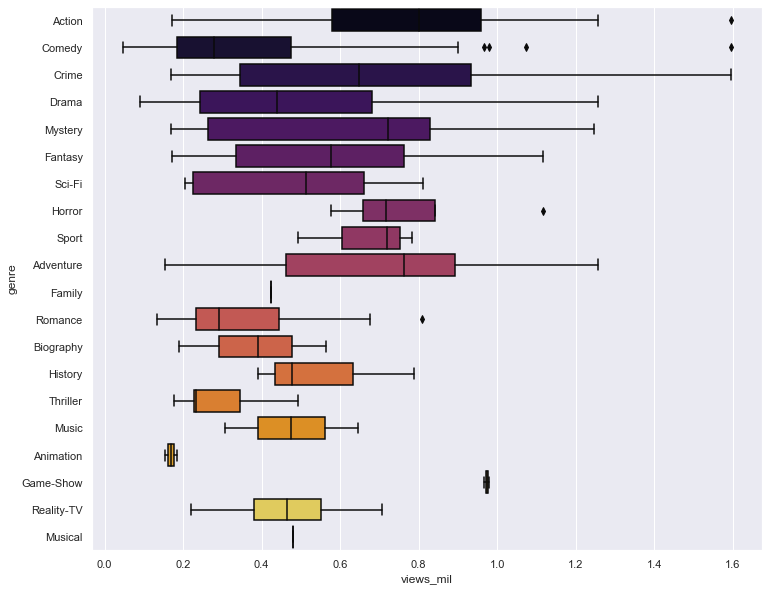

In [36]:
sns.boxplot(x=ntv_df_noutlier['views_mil'], y=ntv_df_noutlier['genre'], palette="inferno")

In [37]:
ntv_df_grouped= ntv_df_noutlier.groupby(['genre']).sum()
ntv_df_grouped.sort_values(by=['views_mil'], inplace=True, ascending=False)
print(ntv_df_grouped.index)
print(ntv_df_grouped)

Index(['Drama', 'Comedy', 'Crime', 'Action', 'Fantasy', 'Mystery', 'Adventure',
       'Sci-Fi', 'Romance', 'Horror', 'Sport', 'Game-Show', 'Reality-TV',
       'History', 'Thriller', 'Biography', 'Music', 'Musical', 'Family',
       'Animation'],
      dtype='object', name='genre')
            views_mil  _18_49_demo
genre                             
Drama          45.802        12.32
Comedy         21.277         6.27
Crime          16.241         4.03
Action          9.510         2.74
Fantasy         9.426         2.54
Mystery         8.678         2.21
Adventure       7.667         2.23
Sci-Fi          3.825         0.98
Romance         3.768         0.83
Horror          3.130         0.80
Sport           1.996         0.73
Game-Show       1.948         0.40
Reality-TV      1.858         0.36
History         1.658         0.36
Thriller        1.474         0.30
Biography       1.146         0.24
Music           0.952         0.37
Musical         0.480         0.11
Family          

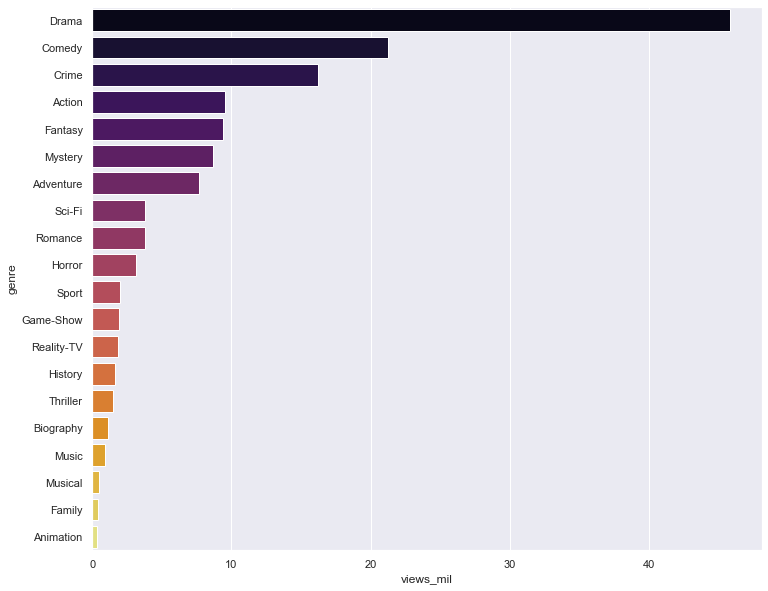

In [38]:
sns.barplot(x=ntv_df_grouped['views_mil'], y=ntv_df_grouped.index,  palette="inferno")

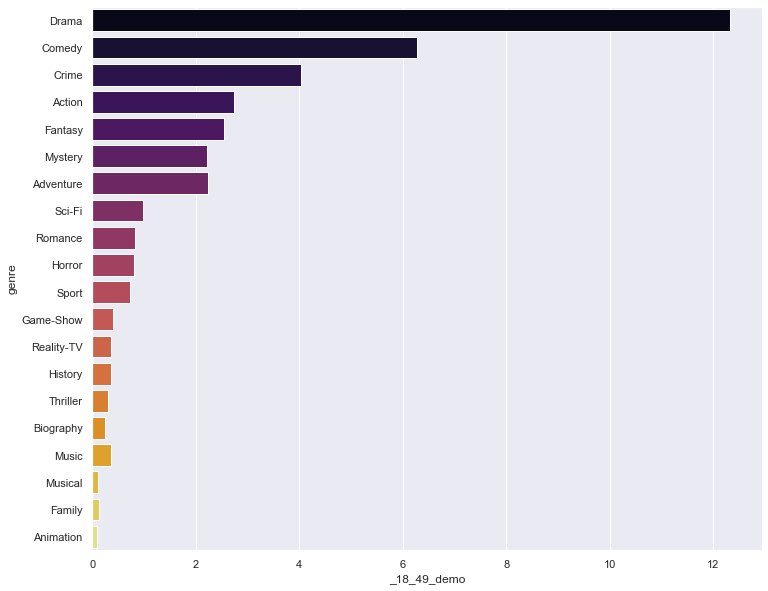

In [39]:
sns.barplot(x=ntv_df_grouped['_18_49_demo'], y=ntv_df_grouped.index, palette="inferno")

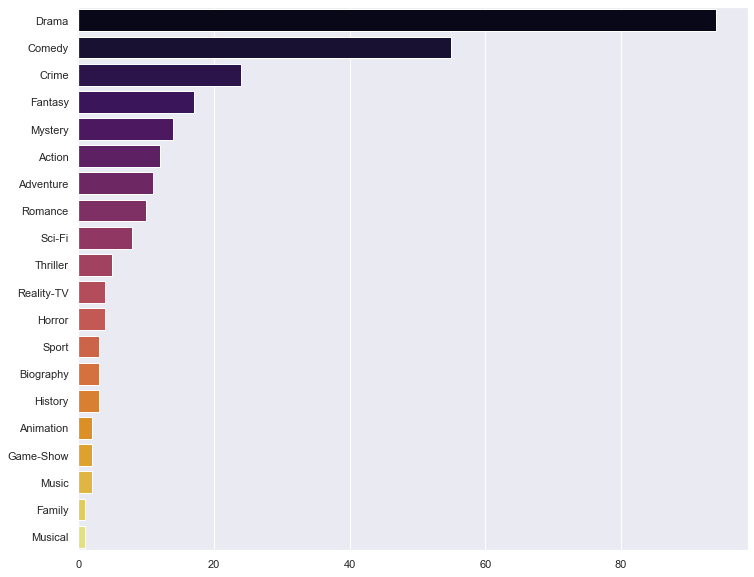

In [40]:
sns.barplot(x=x.values, y=x.index, palette="inferno")

In [41]:
ntv_df_noutlier_sorted =ntv_df_noutlier.sort_values(by=['views_mil'],ascending=False).sort_values(by=['network'])
print(ntv_df_noutlier_sorted)


           tv_show   network  views_mil season  _18_49_demo    genre
88   Web Therapy*   Showtime      0.046     s4         0.01   Comedy
79  House of Lies   Showtime      0.323     s5         0.14    Drama
79  House of Lies   Showtime      0.323     s5         0.14   Comedy
80        Roadies   Showtime      0.307     s1         0.09   Comedy
80        Roadies   Showtime      0.307     s1         0.09    Drama
..             ...       ...        ...    ...          ...      ...
50   Togetherness        hbo      0.338     s2         0.10    Drama
50   Togetherness        hbo      0.338     s2         0.10   Comedy
50   Togetherness        hbo      0.338     s2         0.10  Romance
6        Westworld       hbo      0.812     s3         0.23    Drama
2           Barry        hbo      1.597     s2         0.43   Action

[275 rows x 6 columns]


In [42]:
network_tv_series_grouped_outliers = network_tv_series_df2.groupby(['network']).count()
print(network_tv_series_grouped_outliers.index)
print(network_tv_series_grouped_outliers)

Index(['Showtime', 'Starz', 'The CW', 'hbo'], dtype='object', name='network')
          tv_show  views_mil  season  _18_49_demo  genre
network                                                 
Showtime       63         63      63           63     63
Starz          44         44      44           44     44
The CW         73         73       0           73     73
hbo           117        117     117          117    117


In [43]:
ntv_df_grouped2= ntv_df_noutlier.groupby(['network', 'genre']).sum()

In [44]:
print(ntv_df_grouped2.index)
print(ntv_df_grouped2)

MultiIndex([('Showtime',  'Adventure'),
            ('Showtime',  'Animation'),
            ('Showtime',  'Biography'),
            ('Showtime',     'Comedy'),
            ('Showtime',      'Crime'),
            ('Showtime',      'Drama'),
            ('Showtime',    'Fantasy'),
            ('Showtime',     'Horror'),
            ('Showtime',      'Music'),
            ('Showtime',    'Mystery'),
            ('Showtime',    'Romance'),
            ('Showtime',   'Thriller'),
            (   'Starz',     'Action'),
            (   'Starz',  'Adventure'),
            (   'Starz',  'Biography'),
            (   'Starz',     'Comedy'),
            (   'Starz',      'Crime'),
            (   'Starz',      'Drama'),
            (   'Starz',    'Fantasy'),
            (   'Starz',    'History'),
            (   'Starz',    'Mystery'),
            (   'Starz',    'Romance'),
            (   'Starz',     'Sci-Fi'),
            (   'Starz',   'Thriller'),
            (  'The CW',     'Action'),


In [45]:
Showtime= ntv_df_grouped2.loc['Showtime']
Showtime.sort_values(by=['views_mil'], inplace=True, ascending=False)
Starz= ntv_df_grouped2.loc['Starz']
Starz.sort_values(by=['views_mil'], inplace=True, ascending=False)
The_CW= ntv_df_grouped2.loc['The CW']
The_CW.sort_values(by=['views_mil'], inplace=True, ascending=False)
HBO= ntv_df_grouped2.loc['hbo']
HBO.sort_values(by=['views_mil'], inplace=True, ascending=False)



In [46]:
Showtime= ntv_df_grouped2.loc['Showtime']
Showtime.sort_values(by=['views_mil'], inplace=True, ascending=False)
print(Showtime)

           views_mil  _18_49_demo
genre                            
Drama          9.950         2.32
Comedy         4.789         1.32
Crime          3.458         0.57
Fantasy        1.213         0.31
Mystery        0.834         0.14
Romance        0.677         0.17
Horror         0.578         0.18
Biography      0.565         0.11
Thriller       0.492         0.06
Music          0.307         0.09
Adventure      0.154         0.02
Animation      0.154         0.02


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

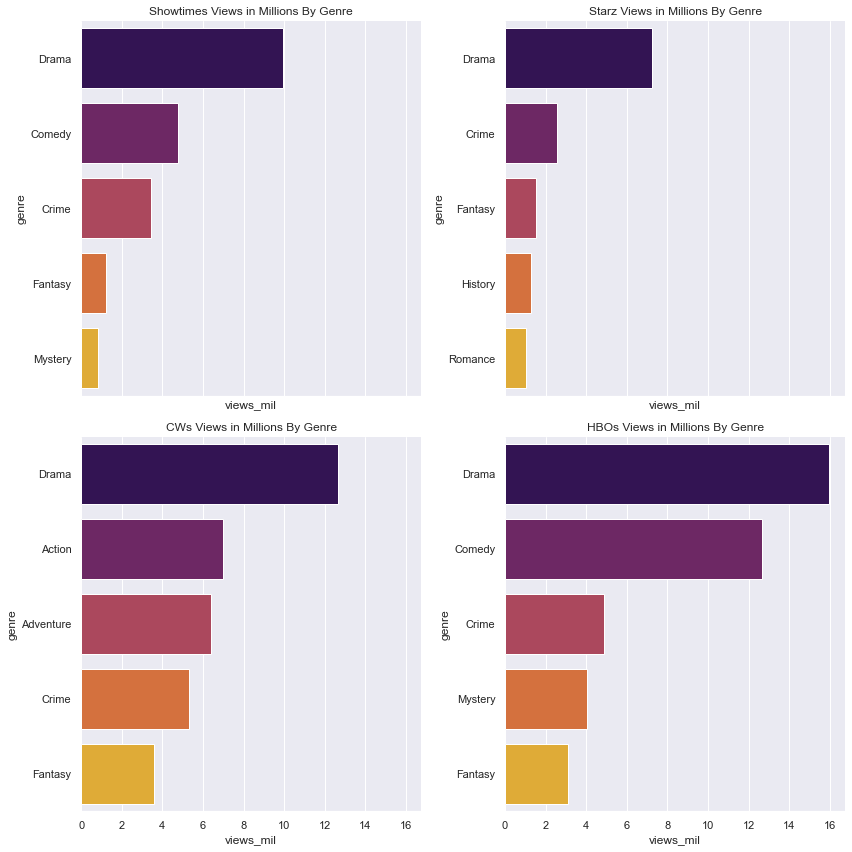

In [47]:
f, axes = plt.subplots(2,2, figsize=(12,12), sharex=True)
sns.despine(left=True)

sns.barplot(x= Showtime['views_mil'].iloc[:5], y= Showtime.index[:5], ax=axes[0, 0], palette="inferno").set_title('Showtimes Views in Millions By Genre')
sns.barplot(x= Starz['views_mil'].iloc[:5], y= Starz.index[:5], ax=axes[0, 1], palette="inferno").set_title('Starz Views in Millions By Genre')
sns.barplot(x= The_CW['views_mil'].iloc[:5], y= The_CW.index[:5], ax=axes[1, 0], palette="inferno").set_title('CWs Views in Millions By Genre')
sns.barplot(x= HBO['views_mil'].iloc[:5], y= HBO.index[:5], ax=axes[1, 1], palette="inferno").set_title('HBOs Views in Millions By Genre')

plt.setp(axes)
plt.tight_layout()

Text(0.5, 1.0, 'Top 5 Genres Total Views in Millions')

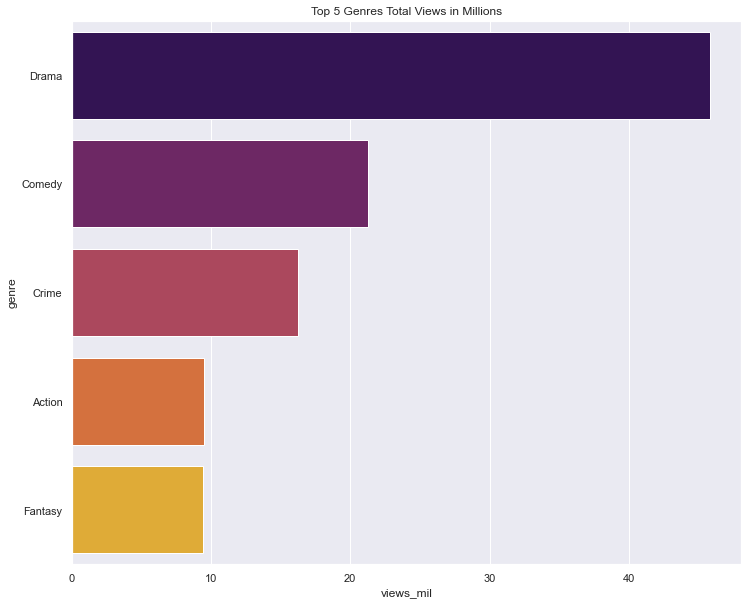

In [48]:
sns.barplot(x=ntv_df_grouped['views_mil'].iloc[:5], y=ntv_df_grouped.index[:5], palette="inferno").set_title('Top 5 Genres Total Views in Millions')

# Insights and Recommendations

### Insight

In todays subscription structured business models the most important variable that determines success is the amount of views. Here I wanted to investigate the total views generated by genres to detemine which genres accumulate the most views. 

From the four networks that were part of this analysis I found 5 genres for tv series with the most views. They are as follows:

1. Drama
2. Comedy
3. Crime
4. Action
5. Fantasy

### Recommendations

In order to break into this industry, I would recommend developing a tv series with the genre Drama being the foundation. This will help meet the demand and increase your chances in gaining higher numbers of subsriptions. 

### Future work

I would like to investigate the best combination of genres with Drama being the core element of the combination and determine which combination provides the most views.

# EDA on the imbd_tv_series_df
### Lets look into the distribution
- Overall distribution
- Distribution in respect to network

In [49]:
imbd_tv_series_df.head()

,tv_show,genre,year,imdb,votes
0,Sherlock,"Crime, Drama, Mystery",(2010–2017),9.1,781937
1,Julie and the Phantoms,"Comedy, Family, Fantasy",(2020– ),8.3,2883
2,Ozark,"Crime, Drama, Thriller",(2017– ),8.4,172935
3,Black Mirror,"Drama, Sci-Fi, Thriller",(2011– ),8.8,421268
4,Sons of Anarchy,"Crime, Drama, Thriller",(2008–2014),8.6,251613


## Droping Duplicates

In [50]:
imbd_tv_series_df.sort_values(by=['votes'], inplace=True, ascending=False)

In [51]:
imbd_tv_series_df1=pd.DataFrame.drop_duplicates(imbd_tv_series_df)
imbd_tv_series_df1.head()

,tv_show,genre,year,imdb,votes
46163,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711936
19427,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711922
16163,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711906
47328,Breaking Bad,"Crime, Drama, Thriller",(2008–2013),9.5,1399435
44640,Breaking Bad,"Crime, Drama, Thriller",(2008–2013),9.5,1399414


In [52]:
imbd_tv_series_df2=pd.DataFrame.drop_duplicates(imbd_tv_series_df1,subset='tv_show')

In [53]:
imbd_tv_series_df2.head()

,tv_show,genre,year,imdb,votes
46163,Game of Thrones,"Action, Adventure, Drama",(2011–2019),9.3,1711936
47328,Breaking Bad,"Crime, Drama, Thriller",(2008–2013),9.5,1399435
47646,The Walking Dead,"Drama, Horror, Thriller",(2010– ),8.2,835332
44741,Friends,"Comedy, Romance",(1994–2004),8.9,790266
0,Sherlock,"Crime, Drama, Mystery",(2010–2017),9.1,781937


_I had to perform the remove duplicates methods twice. The first one was to remove the duplicates that match in all columns, however I noticed that there were multiple counts of the same tv show. I wanted a list that will have the maximum votes value for each unique tv show. I sorted the dataframe in descending order and perform a drop duplicate with the subset being tv show._

## Explode method to separate genres

_The following cells will use a method .explode() to separate each individual genre and link it to the corresponding related columns it was originally connected to before using the method._

In [54]:
imbd_tv_series_df2['genre'] = imbd_tv_series_df2['genre'].str.split(',', 3)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
imbd_tv_series_df2 = imbd_tv_series_df2.explode('genre')

In [56]:
imbd_tv_series_df2.head()

,tv_show,genre,year,imdb,votes
0,Sherlock,Crime,(2010–2017),9.1,781937
0,Sherlock,Drama,(2010–2017),9.1,781937
0,Sherlock,Mystery,(2010–2017),9.1,781937
1,Julie and the Phantoms,Comedy,(2020– ),8.3,2883
1,Julie and the Phantoms,Family,(2020– ),8.3,2883


In [57]:
imbd_tv_series_df2.genre.unique()

array(['Crime', ' Drama', ' Mystery', 'Comedy', ' Family', ' Fantasy',
       ' Thriller', 'Drama', ' Sci-Fi', ' Crime', 'Action', ' Horror',
       'Adventure', ' Romance', ' Adventure', 'Animation', ' Comedy',
       ' History', ' Action', ' Music', 'Documentary', 'Biography',
       'Reality-TV', ' Biography', ' Sport', 'Short', ' War', 'Western',
       'Thriller', ' Western', 'Family', ' Reality-TV', 'Mystery',
       ' Short', 'Game-Show', ' Talk-Show', 'Horror', 'Sci-Fi',
       ' Musical', ' News', ' Game-Show', 'Music', 'Fantasy', 'Talk-Show',
       'Romance', 'History', 'News', 'Sport', ' Animation', 'Musical',
       ' Documentary', 'War'], dtype=object)

In [58]:
imbd_tv_series_df2.sort_values(by=['votes'], inplace=True, ascending=False)

In [59]:
imbd_tv_series_df2.head()

,tv_show,genre,year,imdb,votes
46163,Game of Thrones,Drama,(2011–2019),9.3,1711936
46163,Game of Thrones,Action,(2011–2019),9.3,1711936
46163,Game of Thrones,Adventure,(2011–2019),9.3,1711936
47328,Breaking Bad,Thriller,(2008–2013),9.5,1399435
47328,Breaking Bad,Crime,(2008–2013),9.5,1399435


In [60]:
imbd_tv_series_df2.genre= imbd_tv_series_df2.genre.str.replace(" ","")

In [61]:
imbd_tv_series_df2.genre.unique()

array(['Drama', 'Action', 'Adventure', 'Thriller', 'Crime', 'Horror',
       'Comedy', 'Romance', 'Mystery', 'Fantasy', 'Sci-Fi', 'Animation',
       'Biography', 'Family', 'History', 'Music', 'Reality-TV', 'Short',
       'Documentary', 'News', 'Talk-Show', 'Sport', 'Musical', 'War',
       'Western', 'Game-Show'], dtype=object)

In [62]:
len(imbd_tv_series_df2)

19380

## IQR to remove Outliers

In [63]:
Q1_imdb = imbd_tv_series_df2.quantile(0.25)
Q3_imdb = imbd_tv_series_df2.quantile(0.75)
IQR_imdb = Q3_imdb - Q1_imdb
print(IQR_imdb)

imdb        1.3
votes    4286.0
dtype: float64


In [64]:
imbd_tv_series_df_noutlier = imbd_tv_series_df2[~((imbd_tv_series_df2 < (Q1_imdb - 1.5 * IQR_imdb)) |
                                         (imbd_tv_series_df2 > (Q3_imdb + 1.5 * IQR_imdb))).any(axis=1)]
imbd_tv_series_df_noutlier.head()

,tv_show,genre,year,imdb,votes
3149,Angel Beats!,Animation,(2010),7.7,11100
3149,Angel Beats!,Action,(2010),7.7,11100
3149,Angel Beats!,Comedy,(2010),7.7,11100
2292,Early Edition,Adventure,(1996–2000),7.5,11076
2292,Early Edition,Comedy,(1996–2000),7.5,11076


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


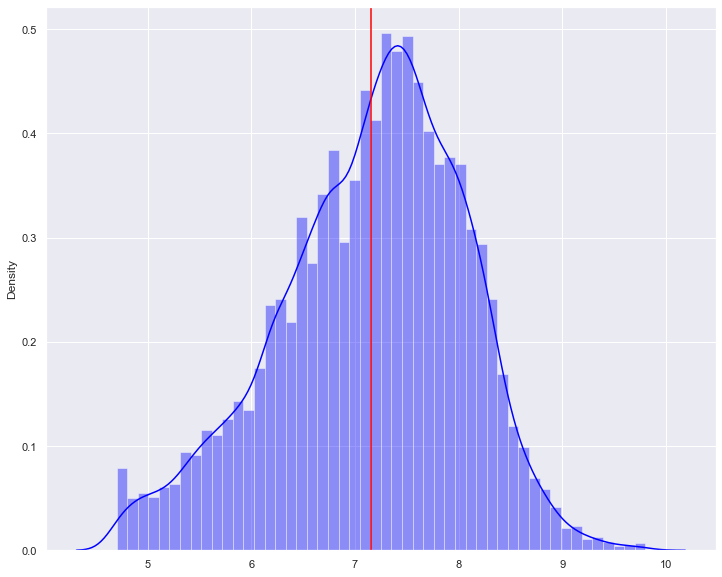

In [65]:
sns.set(rc={'figure.figsize':(12,10)})
x1= imbd_tv_series_df_noutlier['imdb'].values
mean1= imbd_tv_series_df_noutlier['imdb'].mean()


sns.distplot(x1, color= 'blue')

# plot the mean on the same graph
plt.axvline(mean1,0,2, color= 'red')
# As you can see it is a left skewd distribution because the mean is to the left.0

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


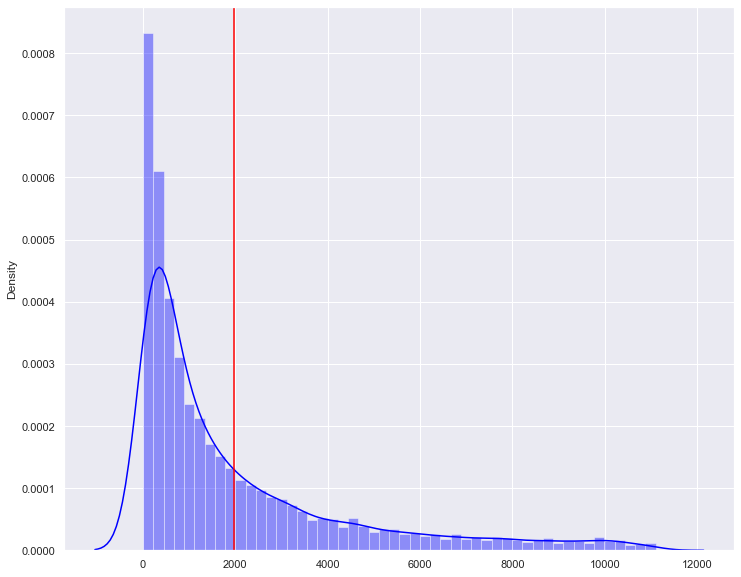

In [66]:
x2= imbd_tv_series_df_noutlier['votes'].values
mean2= imbd_tv_series_df_noutlier['votes'].mean()


sns.distplot(x2, color= 'blue')

# plot the mean on the same graph
plt.axvline(mean2,0,2, color= 'red')

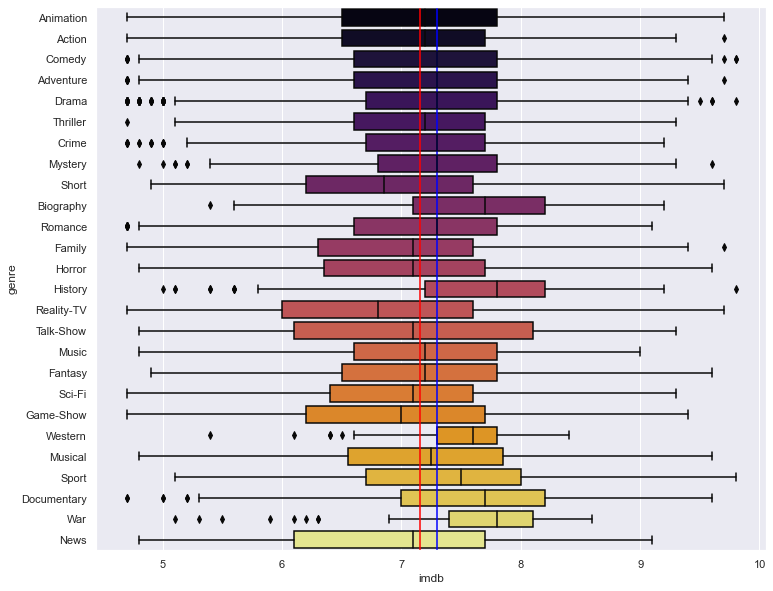

In [67]:
sns.boxplot(x=imbd_tv_series_df_noutlier['imdb'], y=imbd_tv_series_df_noutlier['genre'], palette="inferno")
mean3= imbd_tv_series_df_noutlier['imdb'].mean()
median3= imbd_tv_series_df_noutlier['imdb'].median()
# plot the mean on the same graph
plt.axvline(mean3,0,2, color= 'red')
plt.axvline(median3,0,2, color= 'blue')

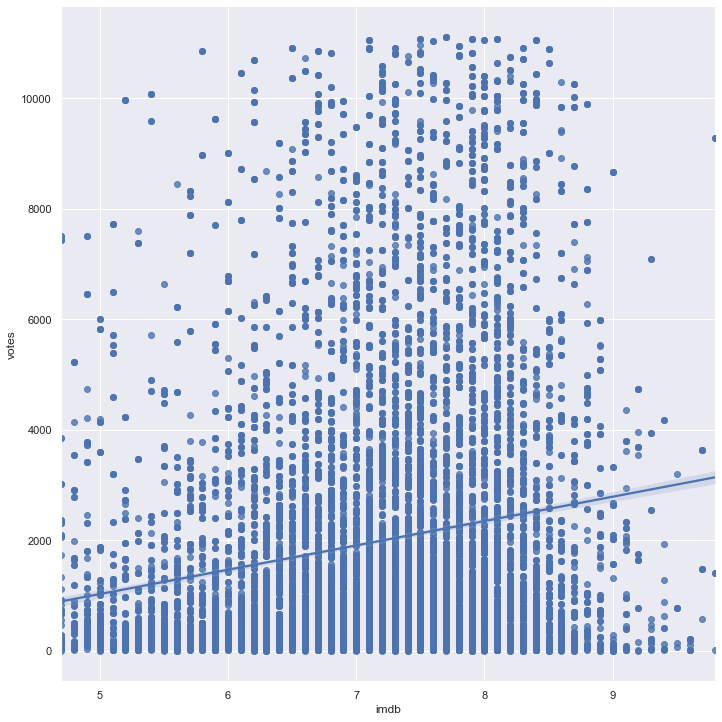

In [68]:
sns.lmplot(x= 'imdb', y= 'votes', data= imbd_tv_series_df_noutlier, height = 10, palette="inferno")

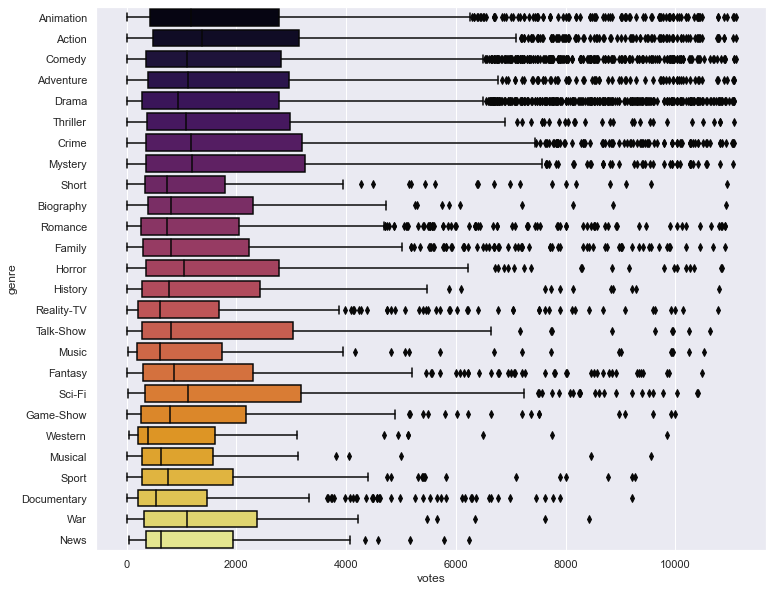

In [69]:
sns.boxplot(x=imbd_tv_series_df_noutlier['votes'], y=imbd_tv_series_df_noutlier['genre'], palette="inferno")

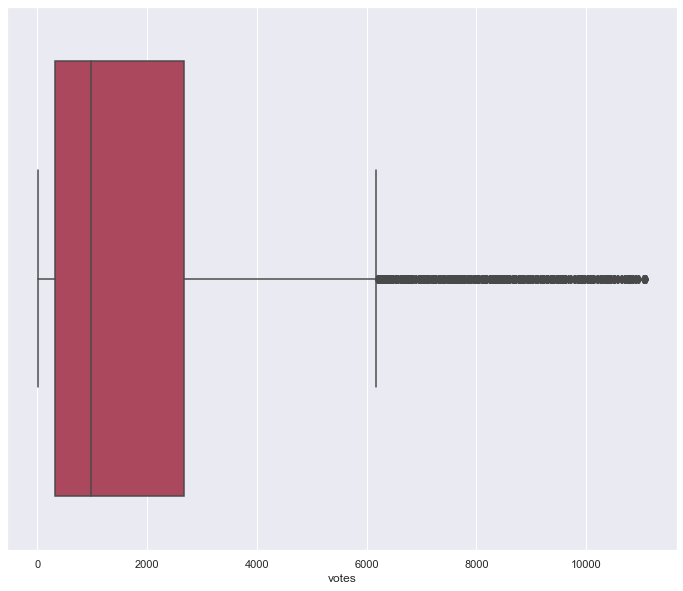

In [70]:
sns.boxplot(x=imbd_tv_series_df_noutlier['votes'], palette="inferno")

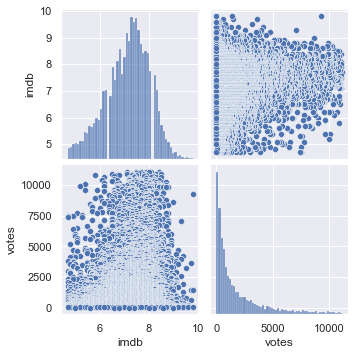

In [71]:
sns.pairplot(imbd_tv_series_df_noutlier)

In [72]:
its_df =imbd_tv_series_df_noutlier.groupby(['genre']).sum()
its_df.sort_values(by=['imdb'], inplace=True, ascending=False)
print(its_df.index)
print(its_df)

Index(['Drama', 'Comedy', 'Animation', 'Action', 'Crime', 'Adventure',
       'Romance', 'Family', 'Mystery', 'Reality-TV', 'Documentary', 'Fantasy',
       'Thriller', 'Sci-Fi', 'Horror', 'History', 'Game-Show', 'Short',
       'Music', 'Talk-Show', 'Biography', 'Sport', 'Western', 'War', 'News',
       'Musical'],
      dtype='object', name='genre')
                imdb    votes
genre                        
Drama        22316.5  6278585
Comedy       20699.0  5893802
Animation     8808.8  2585811
Action        8145.8  2659910
Crime         7984.1  2520497
Adventure     7001.7  2071124
Romance       5684.2  1289829
Family        5346.2  1295548
Mystery       3922.5  1258432
Reality-TV    3590.5   708734
Documentary   3338.2   512547
Fantasy       3181.5   795766
Thriller      2568.4   783050
Sci-Fi        1990.6   639926
Horror        1457.0   437589
History       1440.5   320110
Game-Show     1153.7   280087
Short         1147.0   264731
Music          999.5   228362
Talk-Show      8

Drama
Comedy
Crime
Action
Fantasy
1. From the recommendation above I want to look at the distribution of each of these genres. 
2. Which of these genres have greatest distribution
3. which of these genres have the greatest mean


In [73]:
its_df_count =imbd_tv_series_df_noutlier.groupby(['genre']).count()
its_df_count.sort_values(by=['imdb'], inplace=True, ascending=False)
print(its_df_count.index)
print(its_df_count)

Index(['Drama', 'Comedy', 'Animation', 'Action', 'Crime', 'Adventure',
       'Romance', 'Family', 'Mystery', 'Reality-TV', 'Fantasy', 'Documentary',
       'Thriller', 'Sci-Fi', 'Horror', 'History', 'Game-Show', 'Short',
       'Music', 'Talk-Show', 'Sport', 'Biography', 'Western', 'War', 'News',
       'Musical'],
      dtype='object', name='genre')
             tv_show  year  imdb  votes
genre                                  
Drama           3100  3100  3100   3100
Comedy          2896  2896  2896   2896
Animation       1237  1236  1237   1237
Action          1148  1147  1148   1148
Crime           1109  1107  1109   1109
Adventure        980   979   980    980
Romance          795   795   795    795
Family           767   767   767    767
Mystery          541   541   541    541
Reality-TV       528   528   528    528
Fantasy          445   445   445    445
Documentary      442   442   442    442
Thriller         360   360   360    360
Sci-Fi           286   286   286    286
Horror

In [74]:
df_genres = imbd_tv_series_df_noutlier.set_index('genre')
interested_genres = df_genres.loc[['Drama', 'Comedy', 'Crime', 'Action', 'Fantasy']]
interested_genres.reset_index(inplace=True)

In [75]:
interested_genres

,genre,tv_show,year,imdb,votes
0,Drama,Early Edition,(1996–2000),7.5,11076
1,Drama,Quarry,(2016),8.1,11072
2,Drama,Aashram,(2020),8.0,11049
3,Drama,Shark,(2006–2008),7.1,11048
4,Drama,Perry Mason,(2020– ),7.6,11031
...,...,...,...,...,...
8693,Fantasy,18 Again,(2020– ),7.8,13
8694,Fantasy,Sankat Mochan Hanumaan,(2012–2013),5.9,12
8695,Fantasy,Assault Lily: Bouquet,(2020– ),6.5,11
8696,Fantasy,Forest Bathing: Friends W/Benefits,(2017– ),6.2,10


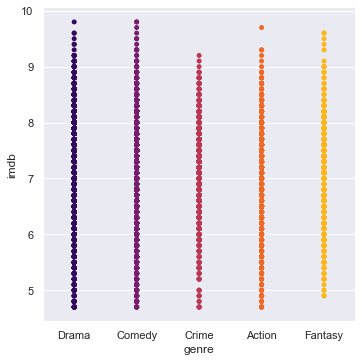

In [76]:
sns.catplot(data=interested_genres, x='genre',y='imdb', jitter=False, palette="inferno")

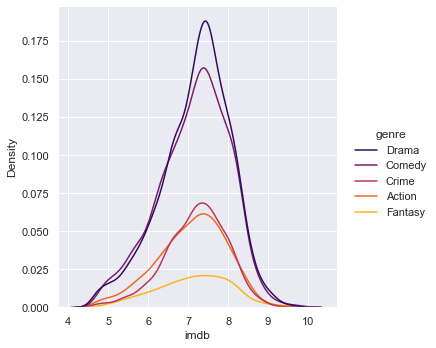

In [77]:
sns.displot(data=interested_genres, x='imdb', hue='genre', kind='kde', palette="inferno")

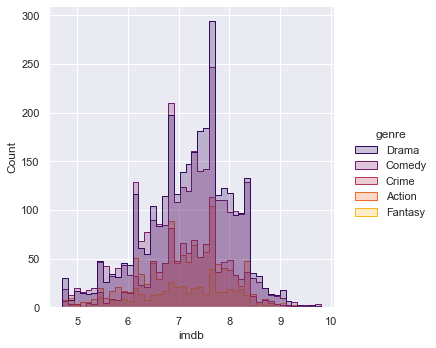

In [78]:
sns.displot(data=interested_genres, x='imdb', hue='genre', element='step', palette="inferno")

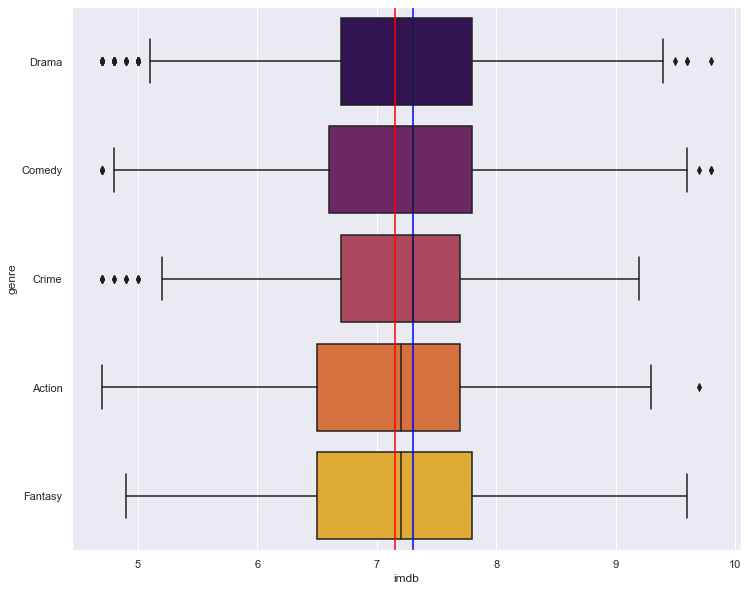

In [80]:
ax= sns.boxplot(x=interested_genres['imdb'], y=interested_genres['genre'], palette="inferno")
mean4= imbd_tv_series_df_noutlier['imdb'].mean()
median4= interested_genres['imdb'].median()
# plot the mean on the same graph
plt.axvline(mean4,0,2, color= 'red')
plt.axvline(median4,0,2, color= 'blue')


In [81]:
x1= interested_genres.loc[interested_genres.imdb > 5]

In [82]:
x1.head()

,genre,tv_show,year,imdb,votes
0,Drama,Early Edition,(1996–2000),7.5,11076
1,Drama,Quarry,(2016),8.1,11072
2,Drama,Aashram,(2020),8.0,11049
3,Drama,Shark,(2006–2008),7.1,11048
4,Drama,Perry Mason,(2020– ),7.6,11031


# Heatmap

In [83]:
x2 = x1.loc[x1.genre == 'Drama']

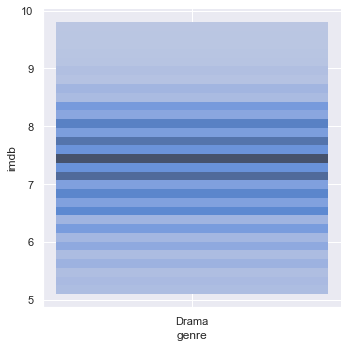

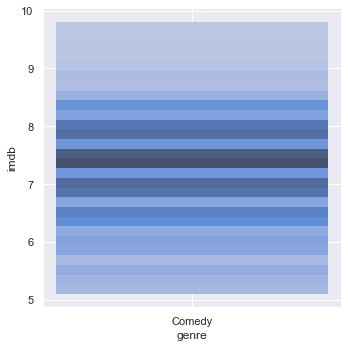

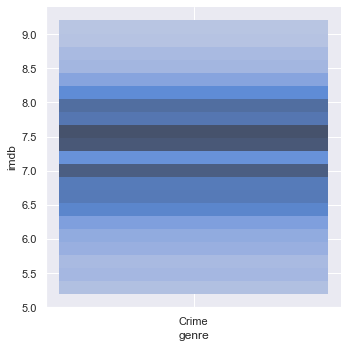

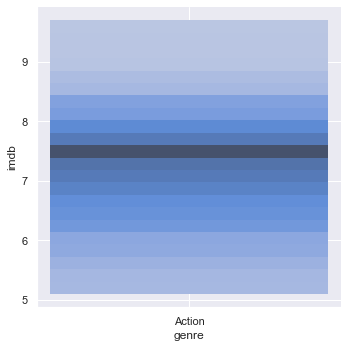

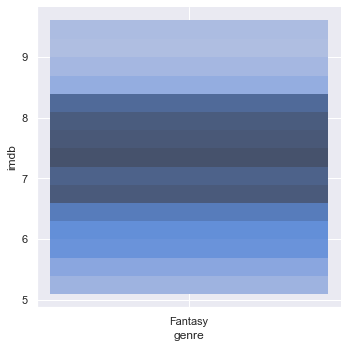

In [84]:
x_Drama = x1.loc[x1.genre == 'Drama']
x_Comedy = x1.loc[x1.genre == 'Comedy']
x_Crime = x1.loc[x1.genre == 'Crime']
x_Action = x1.loc[x1.genre == 'Action']
x_Fantasy = x1.loc[x1.genre == 'Fantasy']

x_genres= [x_Drama,x_Comedy,x_Crime,x_Action,x_Fantasy]
z_genres= ['Drama','Comedy','Crime','Action','Fantasy']

for i in x_genres:
    sns.displot(data=i, x="genre", y="imdb", palette="inferno")

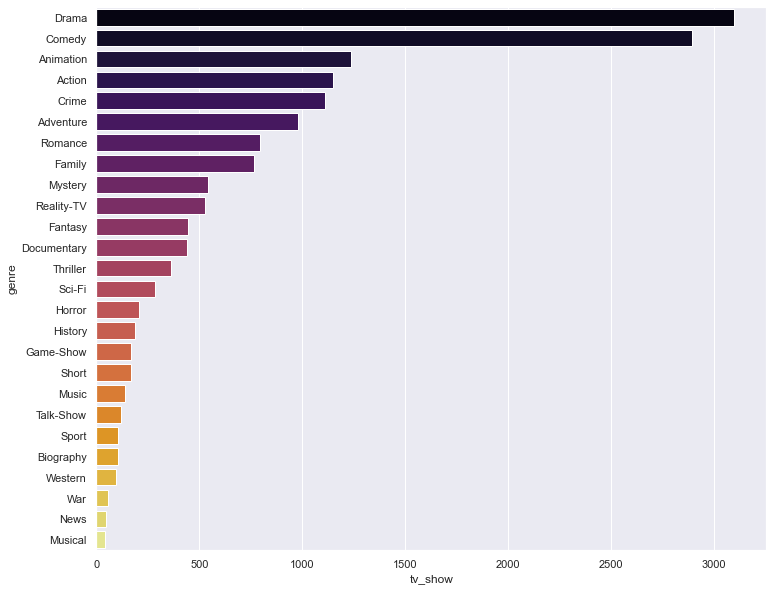

In [85]:
sns.barplot(x=its_df_count['tv_show'], y=its_df_count.index, palette="inferno")

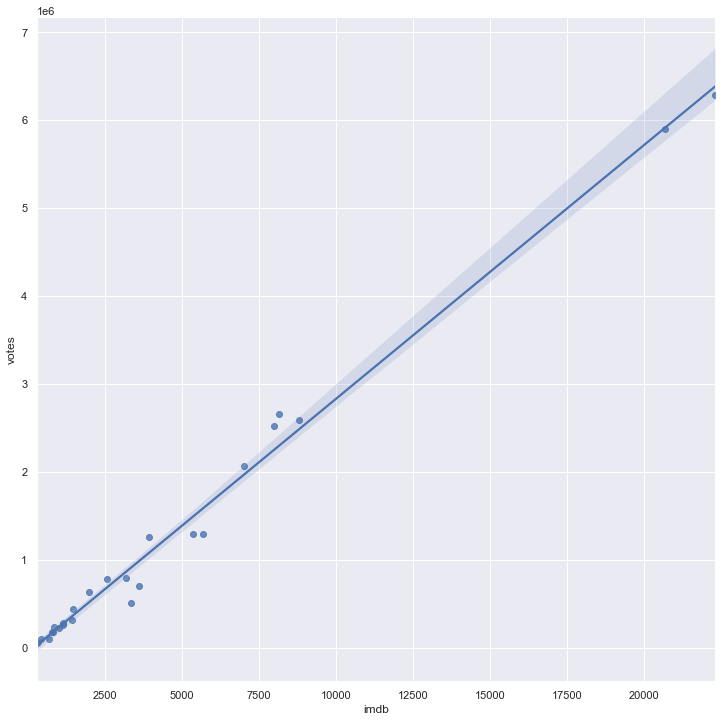

In [86]:
sns.lmplot(x= 'imdb', y= 'votes', data=its_df , height = 10)

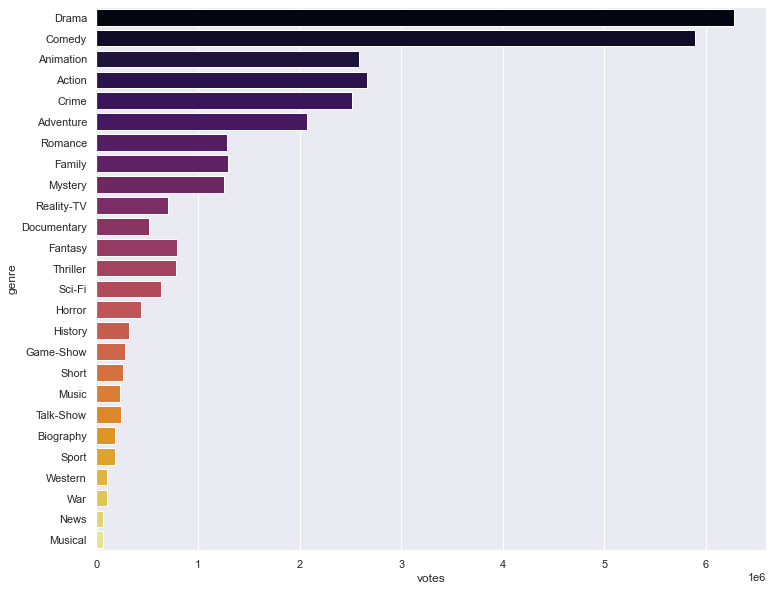

In [87]:
sns.barplot(x=its_df['votes'], y=its_df.index, palette="inferno")

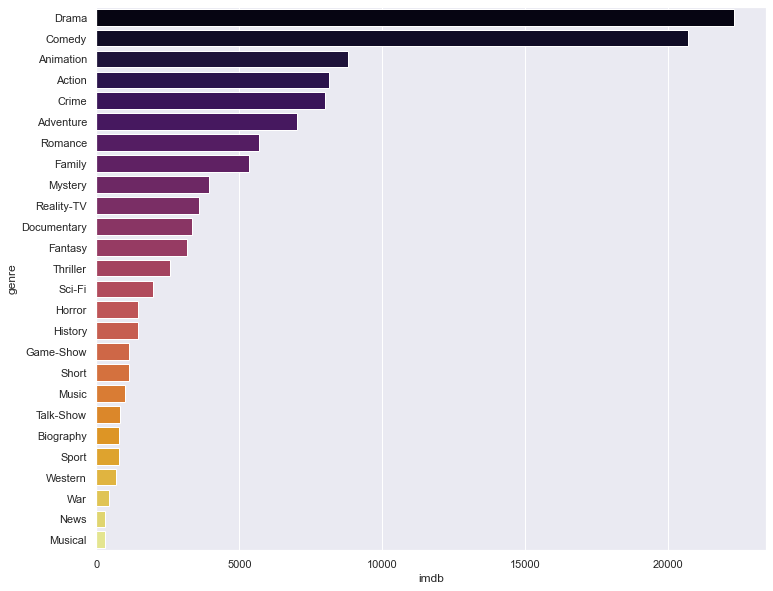

In [88]:
sns.barplot(x=its_df['imdb'], y=its_df.index, palette="inferno")

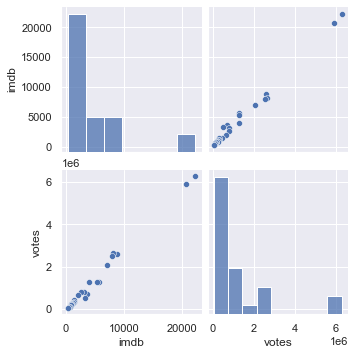

In [89]:
sns.pairplot(data=its_df)